### 필수과제 2
- 고객데이터를 올릴 것
- 해당 고객데이터를 기반으로 여러분들이 가설을 세워서 어떤 컬럼을 사용할 것인지 정리하고
- 해당 컬럼을 기반으로 kmeans를 진행하여서 분석에 대한 인사이트를 정리해 주세요!
- 군집에 대해서 몇 개를 선정하는지에 대한 질문의 답변은 위에 적어놨으니
- 가능하신 분은 구글링을 통해서 해당 지표도 만들어 보시면 좋을 것 같습니다.
- 중요한 것은 인사이트
- 기존에 데이터가 어떤 패턴을 보였고, 우리가 선정한 컬럼을 통해서 만들어진 군집(고객군)이 어떤 패턴을 보이는지?

In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
trade = pd.read_csv("NH거래고객데이터.csv")

In [3]:
trade

,Unnamed: 0,계좌,성별,연령구간,투자성향,고객자산구간,주거래상품군,LIFESTAGE,고객등급,총투자기간,주거래업종구분
0,0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9
3,3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
4,4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2fdd734bf8fc04c0d484ddc1d021622a1cdc802705702e...,1,9,4,2,2,9,5,2,16
9996,9996,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,2,2,3,1,2,2,9,1,16
9997,9997,7702030b3b0760e6b37c8a3e8ed58611b1b85913526ad1...,2,7,4,2,2,5,5,2,16
9998,9998,4006ddaa5673365096b9dd5965e20db866f6523c162f79...,1,5,99,5,2,5,3,2,5


In [4]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   계좌          10000 non-null  object
 2   성별          10000 non-null  int64 
 3   연령구간        10000 non-null  int64 
 4   투자성향        10000 non-null  int64 
 5   고객자산구간      10000 non-null  int64 
 6   주거래상품군      10000 non-null  int64 
 7   LIFESTAGE   10000 non-null  int64 
 8   고객등급        10000 non-null  int64 
 9   총투자기간       10000 non-null  int64 
 10  주거래업종구분     10000 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 859.5+ KB


In [5]:
trade.isna().sum() # 결측치 없음

Unnamed: 0    0
계좌            0
성별            0
연령구간          0
투자성향          0
고객자산구간        0
주거래상품군        0
LIFESTAGE     0
고객등급          0
총투자기간         0
주거래업종구분       0
dtype: int64

In [6]:
trade.columns

Index(['Unnamed: 0', '계좌', '성별', '연령구간', '투자성향', '고객자산구간', '주거래상품군',
       'LIFESTAGE', '고객등급', '총투자기간', '주거래업종구분'],
      dtype='object')

In [7]:
trade = trade[['성별', '연령구간', '투자성향', '고객자산구간', '주거래상품군', 
               'LIFESTAGE', '고객등급', '총투자기간', '주거래업종구분']]
# 분석에 사용할 수 없는 컬럼 제거

> #### 분석 진행 과정
> - 적절한 k값 찾기(elbow method, silhouette score)
> - 모든 컬럼 kmeans
> - 가설 설정 => 선정한 컬럼을 가지고 kmeans
> - 선택한 컬럼에서 적절한 k값 찾기

### 모든 컬럼 사용 시 k값 찾기

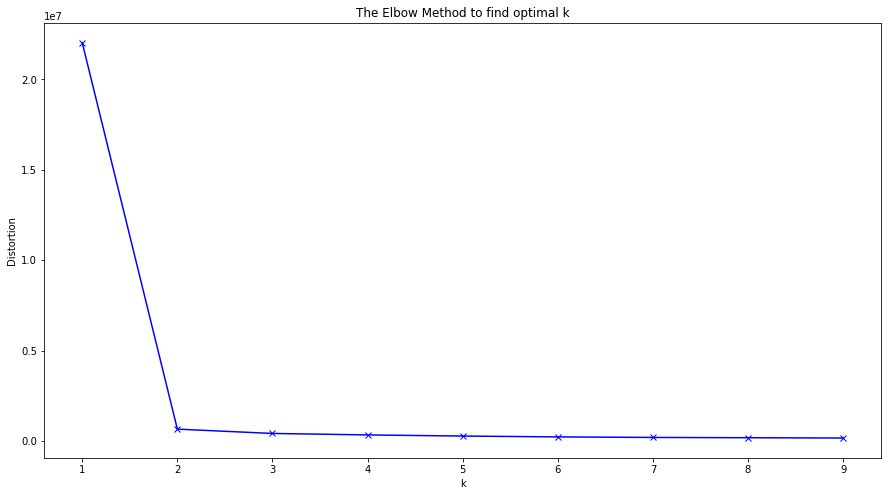

In [8]:
# Elbow method
dist = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300)
    kmeans.fit(trade)
    dist.append(kmeans.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(1,10), dist, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method to find optimal k")
plt.show()

In [10]:
# Silhouette Score
from sklearn.metrics import silhouette_score

sil = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300)
    kmeans.fit(trade)
    ss = silhouette_score(trade, kmeans.labels_)
    sil.append(ss)
    print("Silhouette Score for k=" + str(k) + ":", round(ss, 4))

Silhouette Score for k=2: 0.914
Silhouette Score for k=3: 0.9178
Silhouette Score for k=4: 0.5085
Silhouette Score for k=5: 0.5092
Silhouette Score for k=6: 0.2941
Silhouette Score for k=7: 0.2812
Silhouette Score for k=8: 0.2664
Silhouette Score for k=9: 0.259


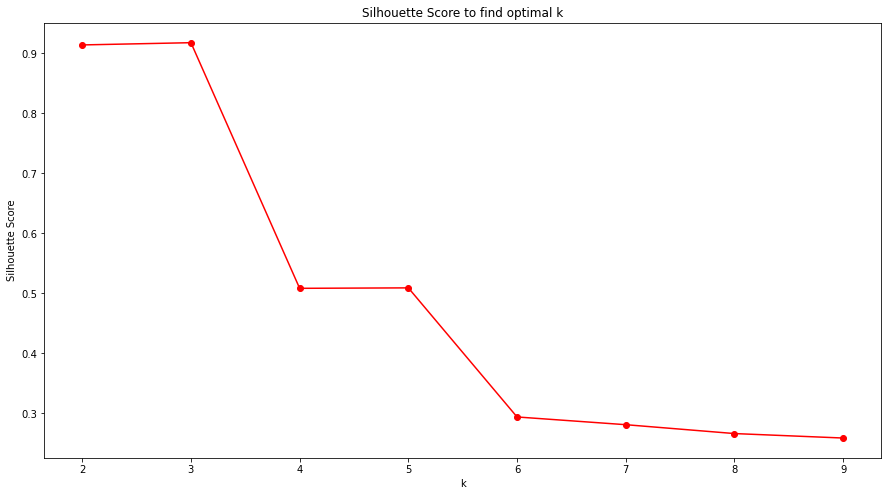

In [22]:
plt.figure(figsize=(15,8))
plt.plot(range(2,10), sil, "ro-")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score to find optimal k")
plt.show()

- k=2가 가장 optimal한 것으로 보인다. (elbow method)
- k=3의 silhouette score가 가장 높다.
- k=2의 silhouette score가 그 다음으로 높다.

- k=2인 kmeans를 진행

### 모든 컬럼을 이용한 kmeans

In [35]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=111)

In [36]:
kmeans

KMeans(n_clusters=2, random_state=111)

In [37]:
kmeans.fit(trade)

KMeans(n_clusters=2, random_state=111)

In [38]:
trade_all = trade
trade_all["cluster"] = kmeans.labels_

C:\Users\doram\AppData\Local\Temp\ipykernel_26580\3088636476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_all["cluster"] = kmeans.labels_


In [39]:
# 생성된 클러스터 확인
trade_all.cluster.value_counts().to_frame()

,cluster
0,6313
1,3687


In [40]:
# 컬럼별 클러스터 차이 확인
for i in list(trade_all.columns):
    print('-----------------',i ,'mean 비교')
    print(trade_all.groupby(['cluster'])[i].mean())

----------------- 성별 mean 비교
cluster
0    1.355299
1    1.480608
Name: 성별, dtype: float64
----------------- 연령구간 mean 비교
cluster
0    4.47220
1    5.04204
Name: 연령구간, dtype: float64
----------------- 투자성향 mean 비교
cluster
0     3.213211
1    99.000000
Name: 투자성향, dtype: float64
----------------- 고객자산구간 mean 비교
cluster
0    2.580706
1    2.174939
Name: 고객자산구간, dtype: float64
----------------- 주거래상품군 mean 비교
cluster
0    2.090765
1    2.002441
Name: 주거래상품군, dtype: float64
----------------- LIFESTAGE mean 비교
cluster
0    4.268018
1    4.795498
Name: LIFESTAGE, dtype: float64
----------------- 고객등급 mean 비교
cluster
0    5.644385
1    6.855438
Name: 고객등급, dtype: float64
----------------- 총투자기간 mean 비교
cluster
0    2.762078
1    2.545159
Name: 총투자기간, dtype: float64
----------------- 주거래업종구분 mean 비교
cluster
0    10.248535
1    10.713046
Name: 주거래업종구분, dtype: float64
----------------- cluster mean 비교
cluster
0    0.0
1    1.0
Name: cluster, dtype: float64


### 가설 설정
- 컬럼 설명을 참고하여 제거할 컬럼을 선택
- 전체 컬럼을 이용한 결과 투자성향을 기준으로 클러스터가 생성되었음을 확인
- 이는 결측치(99) 여부에 따른 분류이므로, 결측치가 많은 투자성향 제외
- LIFESTAGE에 성별 및 연령 정보가 포함되어있으므로 성별, 연령구간 컬럼 제외
- 고객자산구간과 고객등급은 유사하므로 결측치가 존재하는 고객등급 제외
- 데이터값의 의미없는 차이가 클러스터링에 영향을 줄 우려가 있어서 주거래업종구분 제외

In [95]:
trade_all.columns

Index(['성별', '연령구간', '투자성향', '고객자산구간', '주거래상품군', 'LIFESTAGE', '고객등급', '총투자기간',
       '주거래업종구분', 'cluster'],
      dtype='object')

In [96]:
# 투자성향이 결측치일 때 1, 이외에는 0으로 클러스터링 되었다.
trade_all.groupby(["투자성향","cluster"]).agg(gcount=("cluster","count"))

,,gcount
투자성향,cluster,
0,0,171
1,0,210
2,0,1467
3,0,1669
4,0,1858
5,0,935
9,0,3
99,1,3687


In [97]:
trade_sel = trade_all[['고객자산구간', '주거래상품군', '총투자기간', 'LIFESTAGE']]

In [98]:
trade_sel

,고객자산구간,주거래상품군,총투자기간,LIFESTAGE
0,1,2,6,3
1,4,2,6,5
2,3,2,6,5
3,4,8,6,5
4,2,2,5,5
...,...,...,...,...
9995,2,2,2,9
9996,1,2,1,2
9997,2,2,2,5
9998,5,2,2,5


### 선택한 컬럼 k값 찾기

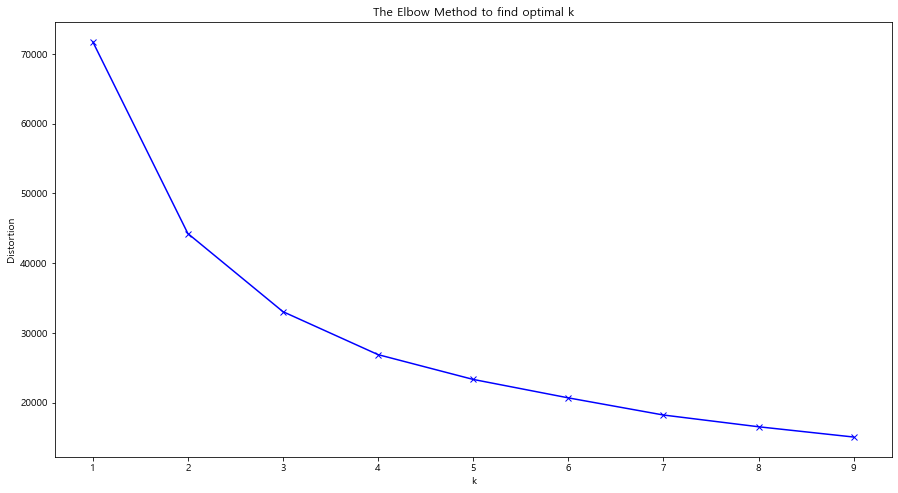

In [99]:
# Elbow method
dist = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300)
    kmeans.fit(trade_sel)
    dist.append(kmeans.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(1,10), dist, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method to find optimal k")
plt.show()

In [100]:
# Silhouette Score
from sklearn.metrics import silhouette_score

sil = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300)
    kmeans.fit(trade_sel)
    ss = silhouette_score(trade_sel, kmeans.labels_)
    sil.append(ss)
    print("Silhouette Score for k=" + str(k) + ":", round(ss, 4))

Silhouette Score for k=2: 0.3486
Silhouette Score for k=3: 0.3612
Silhouette Score for k=4: 0.3455
Silhouette Score for k=5: 0.347
Silhouette Score for k=6: 0.329
Silhouette Score for k=7: 0.3287
Silhouette Score for k=8: 0.31
Silhouette Score for k=9: 0.3211


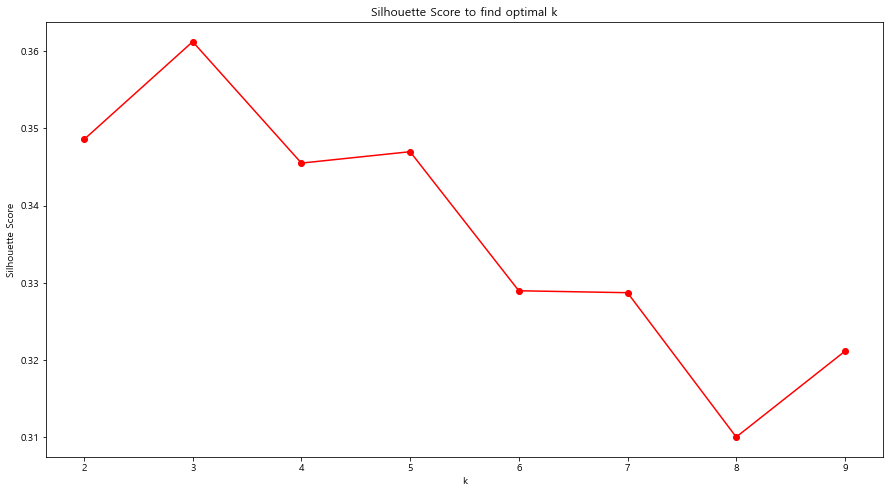

In [101]:
plt.figure(figsize=(15,8))
plt.plot(range(2,10), sil, "ro-")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score to find optimal k")
plt.show()

- k=3가 가장 optimal한 것으로 보인다. (elbow method)
- k=3의 silhouette score가 가장 높다.

- k=3인 kmeans를 진행

### 선택한 컬럼으로 kmeans

In [102]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=111)

In [103]:
kmeans

KMeans(n_clusters=3, random_state=111)

In [104]:
kmeans.fit(trade_sel)

KMeans(n_clusters=3, random_state=111)

In [105]:
trade_sel_c = trade_sel
trade_sel_c["cluster"] = kmeans.labels_

C:\Users\doram\AppData\Local\Temp\ipykernel_26580\964641084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_sel_c["cluster"] = kmeans.labels_


In [106]:
# 생성된 클러스터 확인
trade_sel_c.cluster.value_counts().to_frame()

,cluster
2,4484
1,3008
0,2508


In [107]:
# 컬럼별 클러스터 차이 확인
for i in list(trade_sel_c.columns):
    print('-----------------',i ,'mean 비교')
    print(trade_sel_c.groupby(['cluster'])[i].mean())

----------------- 고객자산구간 mean 비교
cluster
0    4.526715
1    1.669548
2    1.769848
Name: 고객자산구간, dtype: float64
----------------- 주거래상품군 mean 비교
cluster
0    2.088118
1    2.023936
2    2.064451
Name: 주거래상품군, dtype: float64
----------------- 총투자기간 mean 비교
cluster
0    3.234848
1    2.660572
2    2.387377
Name: 총투자기간, dtype: float64
----------------- LIFESTAGE mean 비교
cluster
0    5.499601
1    6.071476
2    2.803078
Name: LIFESTAGE, dtype: float64
----------------- cluster mean 비교
cluster
0    0.0
1    1.0
2    2.0
Name: cluster, dtype: float64


In [108]:
trade_sel.query("cluster == 0").describe()

,고객자산구간,주거래상품군,총투자기간,LIFESTAGE,cluster
count,2508.000000,2508.000000,2508.000000,2508.000000,2508.0
mean,4.526715,2.088118,3.234848,5.499601,0.0
std,0.866707,0.744485,1.052411,1.564591,0.0
min,3.000000,1.000000,1.000000,2.000000,0.0
25%,4.000000,2.000000,3.000000,5.000000,0.0
50%,5.000000,2.000000,3.000000,5.000000,0.0
75%,5.000000,2.000000,4.000000,7.000000,0.0
max,6.000000,15.000000,6.000000,9.000000,0.0


In [109]:
trade_sel.query("cluster == 1").describe()

,고객자산구간,주거래상품군,총투자기간,LIFESTAGE,cluster
count,3008.000000,3008.000000,3008.000000,3008.000000,3008.0
mean,1.669548,2.023936,2.660572,6.071476,1.0
std,0.683194,0.474938,0.950110,1.281164,0.0
min,1.000000,1.000000,1.000000,5.000000,1.0
25%,1.000000,2.000000,2.000000,5.000000,1.0
50%,2.000000,2.000000,3.000000,6.000000,1.0
75%,2.000000,2.000000,3.000000,7.000000,1.0
max,3.000000,15.000000,6.000000,9.000000,1.0


In [110]:
trade_sel.query("cluster == 2").describe()

,고객자산구간,주거래상품군,총투자기간,LIFESTAGE,cluster
count,4484.000000,4484.000000,4484.000000,4484.000000,4484.0
mean,1.769848,2.064451,2.387377,2.803078,2.0
std,0.939680,0.566830,0.828357,0.766974,0.0
min,1.000000,1.000000,1.000000,2.000000,2.0
25%,1.000000,2.000000,2.000000,2.000000,2.0
50%,2.000000,2.000000,2.000000,3.000000,2.0
75%,2.000000,2.000000,3.000000,3.000000,2.0
max,5.000000,15.000000,6.000000,4.000000,2.0


### 데이터 시각화

In [111]:
import seaborn as sns

In [112]:
# 한글 폰트 코드
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

platform.system() == 'Windows'
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

<AxesSubplot:xlabel='고객자산구간', ylabel='count'>

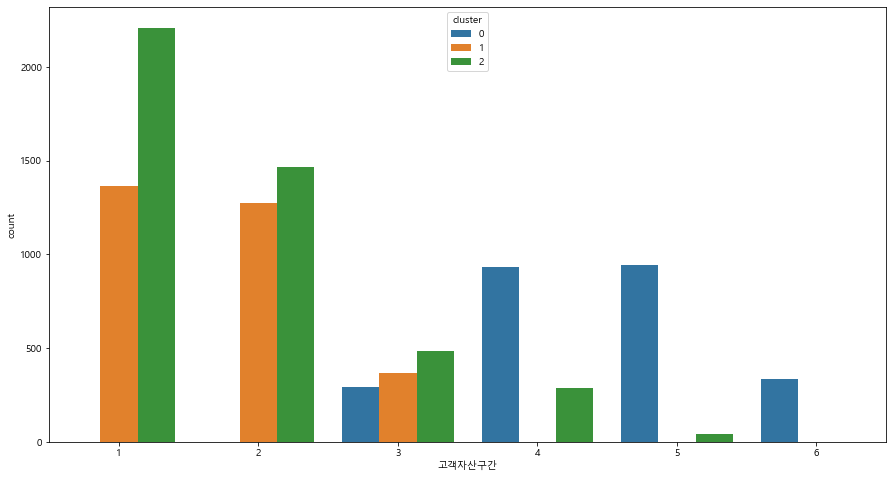

In [113]:
# cluster별 고객자산구간 시각화
plt.figure(figsize=(15,8))
sns.countplot(x="고객자산구간", hue="cluster", data=trade_sel)

In [114]:
# cluster별 주거래상풍군 빈도표
trade_sel.groupby(["주거래상품군","cluster"]).agg(count=("cluster","count"))

count
주거래상품군 cluster       
1      0            3
       1           16
       2           15
2      0         2418
       1         2959
       2         4282
3      0           67
       1           25
       2          169
5      0            1
       1            2
       2            4
6      1            1
       2            2
8      0            6
       2            2
9      0            1
       1            2
       2            2
10     0            6
       2            3
11     0            3
12     0            1
15     0            2
       1            3
       2            5

<AxesSubplot:xlabel='총투자기간', ylabel='count'>

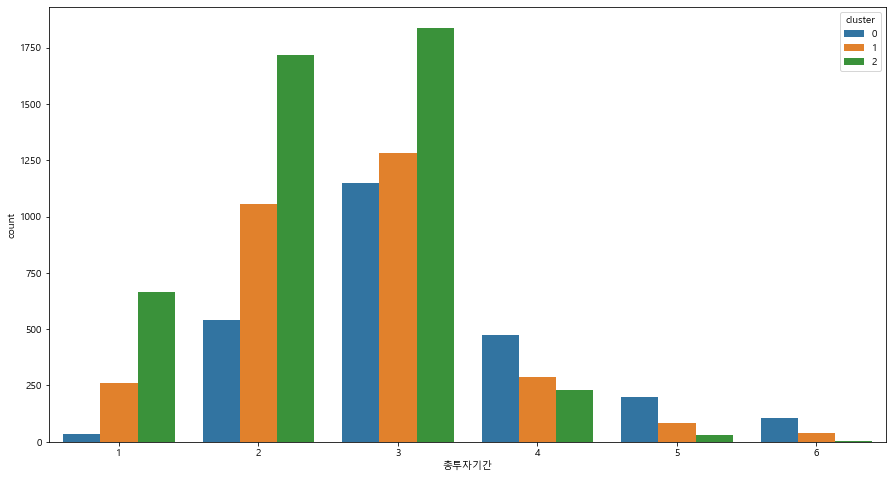

In [115]:
# cluster별 총투자기간 시각화
plt.figure(figsize=(15,8))
sns.countplot(x="총투자기간", hue="cluster", data=trade_sel)

<AxesSubplot:xlabel='LIFESTAGE', ylabel='count'>

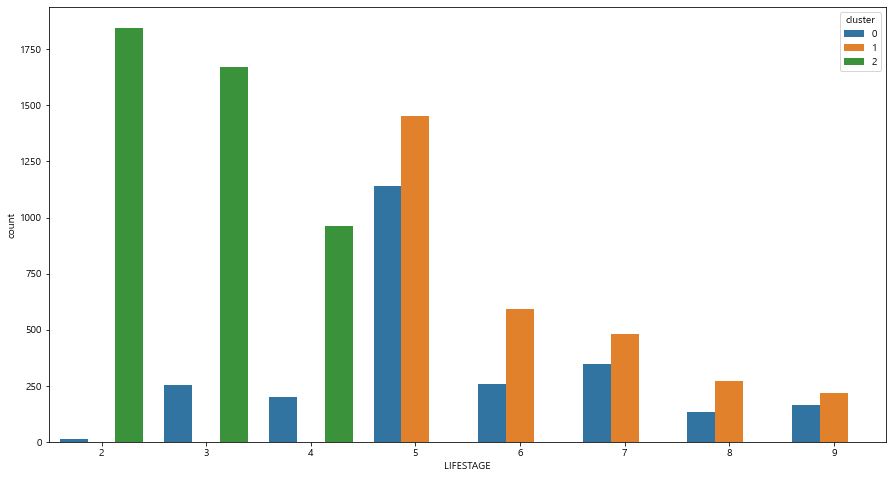

In [116]:
# cluster별 LIFESTAGE 시각화
plt.figure(figsize=(15,8))
sns.countplot(x="LIFESTAGE", hue="cluster", data=trade_sel)

- 새로 선택한 컬럼의 경우 고객자산구간, LIFESTAGE를 기준으로 많이 나뉨
- 0: 고객자산구간이 높은(자산이 많은) 데이터가 대부분
- 1: 고객자산구간이 낮은(자산이 적은) 데이터가 대부분
- 2: 고객자산구간이 적은 데이터가 많지만, 높은 데이터도 존재


- 클러스터 1,2의 경우 총투자기간이 적은(1~3) 데이터의 비율이 많음
- 클러스터 0의 경우 총투자기간이 많은(4~6) 데이터의 비율이 많음


- 0: 고객 Lifestage가 대체로 고르게 분포되어있고, 40-59세 직장인 남자(5)의 비율이 특히 높음
- 1: 연령대가 40-59세, 혹은 그 이상인 고객 데이터가 대부분이고(5~9), 이중에서 직장인 남자(5)의 비율이 특히 높음
- 2: 상대적으로 연령대가 낮은 고객이 대부분이고(2~4), 사회초년생(1)과 30-39세 남자(2)의 비율이 높음